In [28]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy as cp

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [41]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=07a1f57ae1b33f062d09abfe013dd8d4


In [30]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [31]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = cp.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | axim
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | nola
Processing Record 10 of Set 1 | goba
Processing Record 11 of Set 1 | mwinilunga
Processing Record 12 of Set 1 | sliema
Processing Record 13 of Set 1 | laguna
Processing Record 14 of Set 1 | garowe
Processing Record 15 of Set 1 | xining
Processing Record 16 of Set 1 | baikunthpur
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | kenai
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | salinopolis
Processing Record 23 of Set 1 | faizabad
Pro

Processing Record 41 of Set 4 | turayf
Processing Record 42 of Set 4 | la asuncion
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | rio gallegos
Processing Record 45 of Set 4 | faanui
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | santa rosa
Processing Record 48 of Set 4 | tual
Processing Record 49 of Set 4 | chuy
Processing Record 50 of Set 4 | lasa
Processing Record 1 of Set 5 | gamba
Processing Record 2 of Set 5 | port hardy
Processing Record 3 of Set 5 | quincy
Processing Record 4 of Set 5 | saint-joseph
Processing Record 5 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | katobu
Processing Record 8 of Set 5 | prince rupert
Processing Record 9 of Set 5 | tshikapa
Processing Record 10 of Set 5 | karpinsk
Processing Record 11 of Set 5 | lebyazhye
Processing Record 12 of Set 5 | krasnoselkup
Processing Record 13 of Set 5 | dun

Processing Record 31 of Set 8 | nome
Processing Record 32 of Set 8 | boa vista
Processing Record 33 of Set 8 | burica
City not found. Skipping...
Processing Record 34 of Set 8 | amudat
Processing Record 35 of Set 8 | ilyich
Processing Record 36 of Set 8 | husavik
Processing Record 37 of Set 8 | ankazoabo
Processing Record 38 of Set 8 | cherskiy
Processing Record 39 of Set 8 | nanakuli
Processing Record 40 of Set 8 | anadyr
Processing Record 41 of Set 8 | aklavik
Processing Record 42 of Set 8 | price
Processing Record 43 of Set 8 | haines junction
Processing Record 44 of Set 8 | shache
Processing Record 45 of Set 8 | mackay
Processing Record 46 of Set 8 | qafsah
City not found. Skipping...
Processing Record 47 of Set 8 | kawalu
Processing Record 48 of Set 8 | dongsheng
Processing Record 49 of Set 8 | masvingo
Processing Record 50 of Set 8 | russell
Processing Record 1 of Set 9 | misratah
Processing Record 2 of Set 9 | vostok
Processing Record 3 of Set 9 | saint-georges
Processing Record

Processing Record 16 of Set 12 | westport
Processing Record 17 of Set 12 | ola
Processing Record 18 of Set 12 | tiberias
Processing Record 19 of Set 12 | los llanos de aridane
Processing Record 20 of Set 12 | leticia
Processing Record 21 of Set 12 | aripuana
Processing Record 22 of Set 12 | elat
Processing Record 23 of Set 12 | gbarnga
Processing Record 24 of Set 12 | gat
Processing Record 25 of Set 12 | mogzon
Processing Record 26 of Set 12 | asuncion
Processing Record 27 of Set 12 | pevek
Processing Record 28 of Set 12 | chapada dos guimaraes
Processing Record 29 of Set 12 | kirya
Processing Record 30 of Set 12 | kitimat
Processing Record 31 of Set 12 | parrita
Processing Record 32 of Set 12 | mandera
Processing Record 33 of Set 12 | buala
Processing Record 34 of Set 12 | abnub
Processing Record 35 of Set 12 | sotuta
Processing Record 36 of Set 12 | jaisalmer
Processing Record 37 of Set 12 | xinyu
Processing Record 38 of Set 12 | teseney
Processing Record 39 of Set 12 | kysyl-syr
Pro

In [34]:
print(len(city_data))

580


In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,64.99,89,6,3.00,AU,2021-01-20 21:04:31
1,Punta Arenas,-53.1500,-70.9167,62.60,45,0,23.02,CL,2021-01-20 21:08:11
2,Puerto Ayora,-0.7393,-90.3518,86.00,62,20,9.22,EC,2021-01-20 21:05:08
3,Port Elizabeth,-33.9180,25.5701,69.01,77,2,5.01,ZA,2021-01-20 21:06:21
4,Ushuaia,-54.8000,-68.3000,62.60,31,40,5.75,AR,2021-01-20 21:08:12
5,Ilulissat,69.2167,-51.1000,21.20,73,100,2.30,GL,2021-01-20 21:08:12
6,Axim,4.8699,-2.2405,79.03,86,100,8.63,GH,2021-01-20 21:08:12
7,Yellowknife,62.4560,-114.3525,-0.99,71,90,9.22,CA,2021-01-20 21:08:12
8,Nola,40.9220,14.5329,50.00,80,89,1.01,IT,2021-01-20 21:08:12
9,Goba,7.0167,39.9833,51.30,47,87,1.88,ET,2021-01-20 21:08:12


In [37]:
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity","Cloudiness","Wind Speed"]

In [38]:
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-01-20 21:04:31,-33.6500,115.3333,64.99,89,6,3.00
1,Punta Arenas,CL,2021-01-20 21:08:11,-53.1500,-70.9167,62.60,45,0,23.02
2,Puerto Ayora,EC,2021-01-20 21:05:08,-0.7393,-90.3518,86.00,62,20,9.22
3,Port Elizabeth,ZA,2021-01-20 21:06:21,-33.9180,25.5701,69.01,77,2,5.01
4,Ushuaia,AR,2021-01-20 21:08:12,-54.8000,-68.3000,62.60,31,40,5.75
5,Ilulissat,GL,2021-01-20 21:08:12,69.2167,-51.1000,21.20,73,100,2.30
6,Axim,GH,2021-01-20 21:08:12,4.8699,-2.2405,79.03,86,100,8.63
7,Yellowknife,CA,2021-01-20 21:08:12,62.4560,-114.3525,-0.99,71,90,9.22
8,Nola,IT,2021-01-20 21:08:12,40.9220,14.5329,50.00,80,89,1.01
9,Goba,ET,2021-01-20 21:08:12,7.0167,39.9833,51.30,47,87,1.88


In [39]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

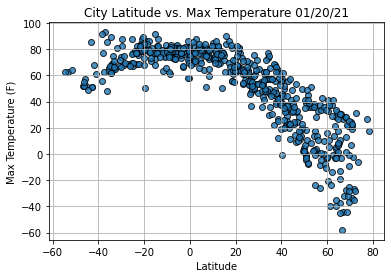

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

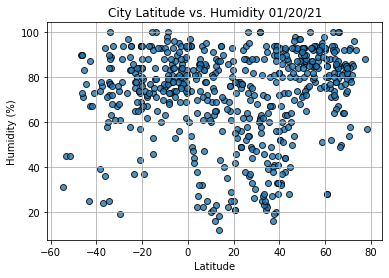

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

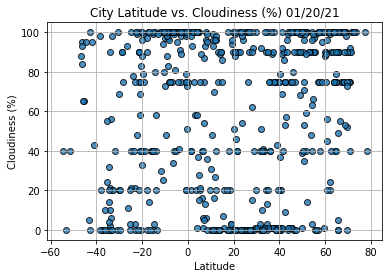

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

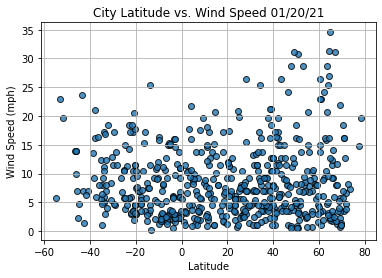

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()